In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop('sales', axis=1)

In [4]:
y = df['sales']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly_converter = PolynomialFeatures( degree=2, include_bias= False)

In [9]:
poly_features = poly_converter.fit_transform(X)

In [10]:
poly_features.shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [12]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
230.1*37.8

8697.779999999999

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mae = mean_absolute_error(y_test, pred)

In [23]:
mse = mean_squared_error(y_test, pred)

In [24]:
rmse = np.sqrt(mse)

In [25]:
mae 

0.5475837919149579

In [26]:
mse

0.46030624938881554

In [27]:
rmse

0.6784587307926809

### Choosing the Correct ploynomial value using for loop

In [28]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,21):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    

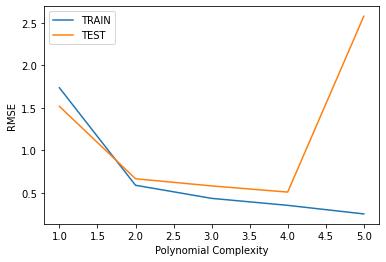

In [29]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

### Final Model

In [30]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [31]:
final_model = LinearRegression()

In [32]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression()